**MÓDULO: Configuração de Ambiente**

Importar bibliotecas e configurar o estilo visual dos gráficos.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.colab import auth

# Configuração estética (Padrão corporativo)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

auth.authenticate_user()
print("Ambiente configurado e usuário autenticado.")

Ambiente configurado e usuário autenticado.


**1. Ingestão de Dados via BigQuery**

Realizamos o consumo de uma amostra de 100.000 registros da tabela refinada para garantir performance durante a análise exploratória.

In [12]:
# Configurações do BigQuery
PROJECT_ID = 'flightontime-hackathon'
client = bigquery.Client(project=PROJECT_ID)

# Consulta SQL otimizada para análise
query = f"SELECT * FROM `{PROJECT_ID}.dados_voos.tabela_treinamento_final` LIMIT 100000"
df = client.query(query).to_dataframe()

print(f"Dados carregados: {df.shape[0]} registros prontos para análise.")

Dados carregados: 100000 registros prontos para análise.


**2. Validação da Qualidade dos Dados**

Nesta etapa, verificamos a presença de valores nulos e a consistência das colunas tratadas.

In [13]:
# Verificação de integridade
print("--- Check de Valores Nulos ---")
print(df.isnull().sum())

print("\n--- Estatísticas Descritivas ---")
display(df.describe())

--- Check de Valores Nulos ---
companhia                0
origem                   0
estado_origem            0
destino                  0
estado_destino           0
distancia                0
atrasado                 0
data_voo                 0
hora_partida_prevista    0
dtype: int64

--- Estatísticas Descritivas ---


,distancia,atrasado,hora_partida_prevista
count,100000.000000,100000.0,100000.0
mean,526.719260,0.17817,1341.05983
std,491.213873,0.382658,496.461509
min,83.000000,0.0,1.0
25%,223.000000,0.0,930.0
50%,377.000000,0.0,1332.0
75%,591.000000,0.0,1745.0
max,3417.000000,1.0,2359.0


**3. Análise da Variável Alvo (Target)**

Visualização da distribuição de voos Pontuais (0) e Atrasados (1) para identificar possíveis desbalanceamentos no dataset.

/tmp/ipython-input-770628937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='atrasado', palette='viridis')


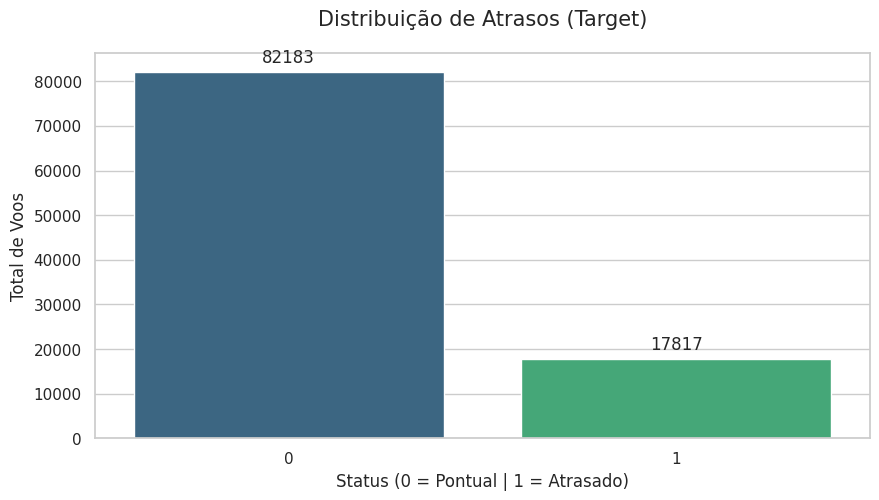

In [14]:
# Visualização da distribuição de atrasos
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='atrasado', palette='viridis')

plt.title('Distribuição de Atrasos (Target)', fontsize=15, pad=20)
plt.xlabel('Status (0 = Pontual | 1 = Atrasado)', fontsize=12)
plt.ylabel('Total de Voos', fontsize=12)

# Adiciona os rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**4. Conclusões da Análise**

**Integridade:** O dataset não apresenta valores ausentes em nenhuma das


**Distribuição do Alvo:** Identificamos que aproximadamente 17,8% dos voos apresentam atrasos superiores a 15 minutos.


**Perfil de Voo:** A distância média dos voos é de 526 milhas, com o voo mais longo chegando a 3417 milhas.


**Próximo Passo:** Os dados estão limpos e validados, prontos para a etapa de Feature Engineering.